In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn_crfsuite import CRF
from sklearn_crfsuite.metrics import flat_accuracy_score

# Load the dataset
data = pd.read_excel("myPOStaggedDataset_Word_PrevWord_NextWord_Next2Word_WL.xlsx")

# Preprocess the data and create the required format for CRF
X = []
y = []

# Group by each sentence using row index
for _, group in data.groupby(data.index // 5):
    sentence_features = []
    sentence_labels = []

    for _, row in group.iterrows():
        features = {
            'Word': str(row['Word']),
            'PrevWord': str(row['PrevWord']),
            'NextWord': str(row['NextWord']),
            'Next2Word': str(row['Next2Word']),
            'WordLength': int(row['WordLength'])
        }
        label = str(row['POS'])

        sentence_features.append(features)
        sentence_labels.append(label)

    X.append(sentence_features)
    y.append(sentence_labels)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the CRF model
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True
)
crf.fit(X_train, y_train)

# Predict on the test set
y_pred = crf.predict(X_test)

# Evaluate the model
accuracy = flat_accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9612240620415007


In [2]:
from sklearn.metrics import classification_report

# Flatten the predicted and true labels for each sentence
flattened_y_test = [label for sentence_labels in y_test for label in sentence_labels]
flattened_y_pred = [label for sentence_labels in y_pred for label in sentence_labels]

# Create a classification report
report = classification_report(flattened_y_test, flattened_y_pred, zero_division=1)

print("Classification Report:")
print(report)

# Evaluate the model
accuracy = flat_accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

        APNA       1.00      0.99      1.00       120
        AUXA       0.95      0.95      0.95       459
        AUXM       0.99      0.94      0.96       113
        AUXP       0.93      0.94      0.93        95
        AUXT       0.98      0.97      0.98       868
          CC       0.98      0.99      0.99       643
          CD       0.97      0.97      0.97       359
          FF       1.00      0.00      0.00         7
          FR       0.88      0.70      0.78        10
         INJ       1.00      0.00      0.00         8
          JJ       0.97      0.89      0.93      1241
         NEG       1.00      0.99      0.99       226
          NN       0.92      0.98      0.95      6550
         NNP       0.94      0.86      0.90      1722
          OD       1.00      0.89      0.94       105
         PDM       0.98      0.98      0.98       485
         PRD       1.00      0.76      0.86        21
    

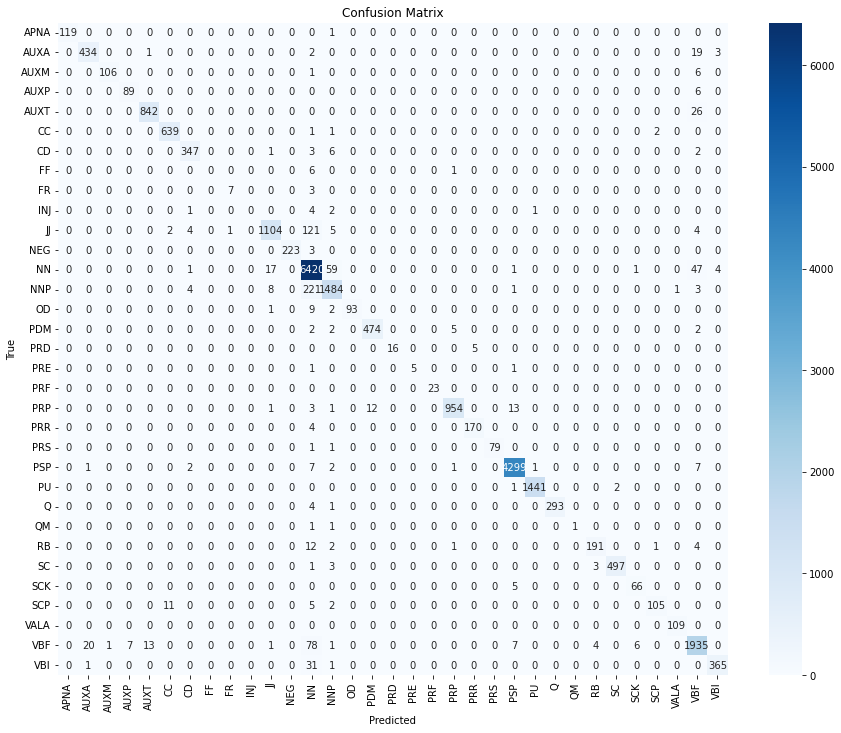

In [3]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the predicted and true labels for each sentence
flattened_y_test = [label for sentence_labels in y_test for label in sentence_labels]
flattened_y_pred = [label for sentence_labels in y_pred for label in sentence_labels]

# Get the unique labels
unique_labels = np.unique(flattened_y_test + flattened_y_pred)

# Create the confusion matrix
conf_matrix = confusion_matrix(flattened_y_test, flattened_y_pred, labels=unique_labels)

# Plot the confusion matrix
plt.figure(figsize=(15, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=unique_labels, yticklabels=unique_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Flatten the predicted and true labels for each sentence
flattened_y_test = [label for sentence_labels in y_test for label in sentence_labels]
flattened_y_pred = [label for sentence_labels in y_pred for label in sentence_labels]

# Get the unique labels
unique_labels = np.unique(flattened_y_test + flattened_y_pred)

# Create the confusion matrix
conf_matrix = confusion_matrix(flattened_y_test, flattened_y_pred, labels=unique_labels)

# Initialize dictionaries to store TP, FP, TN, FN for each label
label_tp = {}
label_fp = {}
label_tn = {}
label_fn = {}

# Compute TP, FP, TN, FN for each label
for i, label in enumerate(unique_labels):
    tp = conf_matrix[i, i]
    fp = conf_matrix[:, i].sum() - tp
    fn = conf_matrix[i, :].sum() - tp
    tn = conf_matrix.sum() - (tp + fp + fn)
    
    label_tp[label] = tp
    label_fp[label] = fp
    label_tn[label] = tn
    label_fn[label] = fn

# Create a DataFrame to display the results
data = {
    'Label': unique_labels,
    'True Positives (TP)': [label_tp[label] for label in unique_labels],
    'False Positives (FP)': [label_fp[label] for label in unique_labels],
    'True Negatives (TN)': [label_tn[label] for label in unique_labels],
    'False Negatives (FN)': [label_fn[label] for label in unique_labels]
}

result_df = pd.DataFrame(data)

# Print the DataFrame
print(result_df)


   Label  True Positives (TP)  False Positives (FP)  True Negatives (TN)  \
0   APNA                  119                     0                23735   
1   AUXA                  434                    22                23374   
2   AUXM                  106                     1                23741   
3   AUXP                   89                     7                23753   
4   AUXT                  842                    14                22973   
5     CC                  639                    13                23199   
6     CD                  347                    12                23484   
7     FF                    0                     0                23848   
8     FR                    7                     1                23844   
9    INJ                    0                     0                23847   
10    JJ                 1104                    29                22585   
11   NEG                  223                     0                23629   
12    NN    

In [ ]:
# Saving the model for later use

In [6]:
import pandas as pd
from sklearn_crfsuite import CRF

# Save the model
import joblib

model_filename ='crf_model_POSTagging.urdu'
joblib.dump(crf, model_filename)

['crf_model_POSTagging.urdu']

In [ ]:
# Prediction of the Model on Unseen out of the corpus data

In [8]:
import pandas as pd

# Load the unseen data from a file
unseen_data = pd.read_excel('validation_Word_PrevWord_NextWord_Next2Word_WL.xlsx')

def preprocess_unseen_data(unseen_data):
    X_unseen = []  # List to store the preprocessed features for the unseen data
    y_unseen = []  # List to store the corresponding labels for the unseen data
    
    # Group by each sentence using row index
    for _, group in unseen_data.groupby(unseen_data.index // 5):
        sentence_features = []
        sentence_labels = []

        for _, row in group.iterrows():
            features = {
                'Word': str(row['Word']),
                'PrevWord': str(row['PrevWord']),
                'NextWord': str(row['NextWord']),
                'Next2Word': str(row['Next2Word']),
                'WordLength': int(row['WordLength'])
            }

            # Since the 'POS' label is not available for unseen data, we can use a placeholder label
            # We can replace 'N/A' with an appropriate placeholder for the label
            label = 'N/A'

            sentence_features.append(features)
            sentence_labels.append(label)

        X_unseen.append(sentence_features)
        y_unseen.append(sentence_labels)

    return X_unseen, y_unseen

# Preprocess the unseen data for prediction
X_unseen, y_unseen = preprocess_unseen_data(unseen_data)

# Load the trained CRF model
loaded_crf = joblib.load('crf_model_POSTagging.urdu')

# Use the loaded model to predict labels for the unseen data
y_pred_unseen = loaded_crf.predict(X_unseen)

# Display the predicted labels for the unseen data
print("Word: Predicted Label")
for i, sentence_pred in enumerate(y_pred_unseen):
    for j, predicted_label in enumerate(sentence_pred):
        word = X_unseen[i][j]['Word']
        print(f"{word}: {predicted_label}")



Word: Predicted Label
بیرون: JJ
ملک: NN
تعلیم: NN
کے: PSP
خواہشمند: NN
نوجوان: JJ
سوشل: JJ
میڈیا: NN
سے: PSP
کیسے: RB
مدد: NN
حاصل: NN
کر: VBF
سکتے: AUXM
ہیں: AUXT
؟: PU
امریکہ: NNP
انگلینڈ: NNP
آسڑیلیا: NNP
یورپ: NNP
جرمنی: NNP
اور: CC
ایسے: PDM
کئی: Q
ممالک: NN
ہیں: VBF
جو: PRR
اس: PDM
وقت: NN
پڑھائی: NN
کے: PSP
لیے: PSP
نوجوانوں: NN
کے: PSP
پسندیدہ: JJ
ملک: NN
تصور: NN
کیے: VBF
جاتے: AUXA
ہیں: AUXT
۔: PU
آج: NN
کل: NN
ہر: JJ
دوسرے: OD
نوجوان: NN
سے: PSP
یہ: PDM
سننے: VBI
کو: PSP
ملتا: VBF
ہے: AUXT
کہ: SC
اس: PRP
نے: PSP
اعلیٰ: JJ
تعلیم: NN
کے: PSP
لیے: PSP
بیرون: JJ
ملک: NN
جانا: VBI
ہے: AUXT
جس: PRR
کے: PSP
لیے: PSP
وہ: PRP
سکالرشپ: NN
ڈھونڈتا: NN
نظر: NN
آتا: VBF
ہے: AUXT
۔: PU
پاکستانی: JJ
سوشل: JJ
میڈیا: NN
پر: PSP
ایسے: PDM
مختلف: JJ
گروپس: NN
اور: CC
پیجز: NN
موجود: JJ
ہیں: VBF
جو: PRR
یونیورسٹی: NN
سکالرشپس: NN
کے: PSP
لیے: PSP
نوجوانوں: NN
کی: PSP
رہنمائی: NN
کرتے: VBF
ہیں: AUXT
۔: PU
یہ: PDM
پیجز: NN
نہ: NEG
صرف: JJ
سکالرشپ: NN
کے: PSP
بارے: PSP
معلومات: NN
فراہم: NN
کرتے: 

In [ ]:
# out of 1161 tokens, 1108 (95.4%) have been correctly predicted and 53 (4.6%) as incorrect. 

In [9]:
# Incorrectly Tagged POS Tags with their incorrect prediction counts are: NN 19, JJ 9, PRP 6, PDM 4, VBI 3, NNP 3, 
# SC 2, VBF 2, SCP 1, INJ 1, AUXA 1, AUXT 1 and OD 1. 

In [ ]:
# increasing the size of the training data may improve further the prediction performance of the model